In [ ]:
!pip install tensorflow-text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 35.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/linkedIn4.csv', sep=';')
df = df.dropna(axis=1)
df.head()

,Text,Class
0,I am a Full-Stack Web Developer who is very in...,0
1,A person who passionate about software develop...,0
2,"Hi, saya adalah seorang web developer saya men...",0
3,"Introducing, a Fresh Graduate of Associate deg...",0
4,"Hi, my name is Octavian Yudha Mahendra, you ca...",2


Kode di ini akan membuat plot horizontal bar yang menampilkan jumlah dan persentase ulasan untuk setiap kelas dalam kolom ‘Class’ dari dataset yang kita punya.

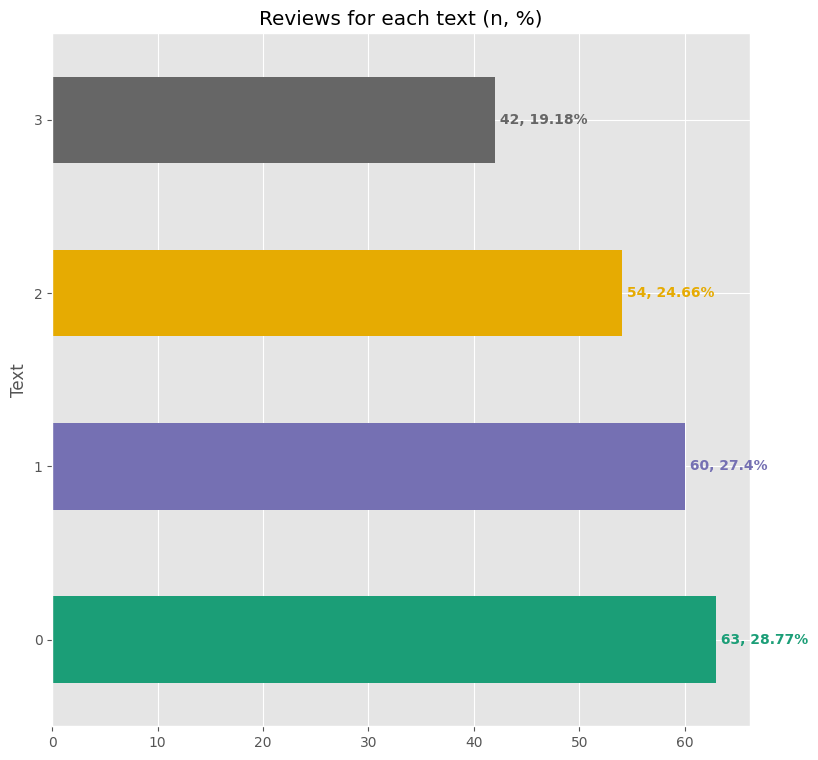

In [ ]:
# Mengimport modul numpy dan matplotlib.pyplot, dan mengatur gaya plot ke ggplot
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Menghitung jumlah kelas yang berbeda pada kolom "Class" pada dataset kamu
num_classes = len(df["Class"].value_counts())

# Membuat array warna berdasarkan jumlah kelas yang berbeda
colors = plt.cm.Dark2(np.linspace(0, 1, num_classes))

# Menginisialisasi variabel iter_color untuk mengiterasi setiap warna pada array warna
iter_color = iter(colors)

# Membuat diagram batang horizontal berdasarkan jumlah text atau profil pelamar kerja yang termasuk ke dalam masing-masing kelas pada kolom "Class" pada dataset kamu
df['Class'].value_counts().plot.barh(title="Reviews for each text (n, %)",
                                                 ylabel="Text",
                                                 color=colors,
                                                 figsize=(9,9))

# Menambahkan teks pada setiap batang diagram yang menunjukkan jumlah text atau profil pelamar kerja pada kelas tertentu
for i, v in enumerate(df['Class'].value_counts()):
    c = next(iter_color)
    plt.text(v, i,
             " "+str(v)+", "+str(round(v*100/df.shape[0],2))+"%",
             color=c,
             va='center',
             fontweight='bold')

Output yang dihasilkan oleh kode tersebut adalah diagram batang horizontal yang menunjukkan jumlah text atau profil pelamar kerja yang termasuk ke dalam masing-masing kelas pada kolom "Class" pada dataset. Setiap batang diagram memiliki teks di sebelah kanan batang yang menunjukkan jumlah text atau profil pelamar kerja pada kelas tertentu dalam bentuk angka dan persentase. Dari diagram tersebut, dapat melihat distribusi text atau profil pelamar kerja pada setiap kelas.

In [ ]:
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Kode ini akan mencetak contoh acak dari teks dalam kolom ‘Text’ yang memiliki nilai ‘Class’ sama dengan 0 dan terjemahannya dalam bahasa Inggris. Pastikan untuk mengganti df dengan nama variabel yang sesuai untuk dataset Anda dan menginstal pustaka yang diperlukan (translate dan termcolor) sebelum menjalankan kode tersebut.

In [ ]:
from translate import Translator
from termcolor import colored

translator= Translator(from_lang="en", to_lang="id")

def print_rand_example(df, col_name, col_value, chars=180):
    '''print a random review and its translation given a label
    Args:
      - df: input dataframe
      - col_name: column to use as filter (e.g. Label)
      - col_value: value of col_name to use as filter
      - chars (optional, def:180) max number of characters to display
    '''
    original = df[df[col_name]==col_value].sample()["Text"].values[0]
    translation = translator.translate(original).replace("&#39;","'")
    print(colored("\nOriginal", 'green', attrs=['bold','underline']))
    print(original[0:chars] + "...")
    print(colored("\nTranslation", 'red', attrs=['bold','underline']))
    print(translation[0:chars] + "...")

# contoh penggunaan fungsi print_rand_example
print_rand_example(df, 'Class', 0)
print_rand_example(df, 'Class', 1)
print_rand_example(df, 'Class', 2)
print_rand_example(df, 'Class', 3)


Original
I really enjoy learning about the latest technology. Currently, I'm learning web development using express.js as Back-End and Next.js as Front-End. And I'm also learning about mobi...

Translation
Saya benar - benar menikmati belajar tentang teknologi terbaru. Saat ini, saya belajar pengembangan web menggunakan express.js sebagai Back - End dan Next.js sebagai Front - End. D...

Original
Hello my name is Dito, I am an iOS Mobile Developer (Native) Using Swift and also someone who is studying the back end of using Golang. Currently I'm hoping to get the opportunity ...

Translation
Halo nama saya Dito, saya seorang iOS Mobile Developer (Native) Menggunakan Swift dan juga seseorang yang sedang mempelajari back end menggunakan Golang. Saat ini saya berharap men...

Original
IÕam a UI/UX Designer in DANA Indonesia. Handling Payment Project : Send Money, Request Money, DANA Kaget, Split Bill, Cashout....

Translation
Saya adalah UI/UX Designer di DANA Indonesia. Penanganan Pembaya

Kode ini akan membagi dataset Anda menjadi data latih dan data uji dengan proporsi 75:25. Kolom ‘Text’ akan digunakan sebagai fitur dan kolom ‘Class’ akan digunakan sebagai label

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

num_classes = len(df["Class"].value_counts())
y = tf.keras.utils.to_categorical(df["Class"].values, num_classes=num_classes)

x_train, x_test, y_train, y_test = train_test_split(df['Text'], y, test_size=0.25)

print("Jumlah data pada data training:", len(x_train))
print("Jumlah data pada data testing:", len(x_test))
print("Jumlah label pada data training:", len(y_train))
print("Jumlah label pada data testing:", len(y_test))

Jumlah data pada data training: 164
Jumlah data pada data testing: 55
Jumlah label pada data training: 164
Jumlah label pada data testing: 55


Yang ingin saya capai adalah mengubah teks menjadi vektor berdimensi tinggi yang menangkap semantik tingkat kalimat. Oleh karena itu, saya melanjutkan dengan memuat lapisan preprocessor dan encoder dari titik akhir yang disediakan oleh TensorFlow Hub, dan menentukan fungsi sederhana untuk mendapatkan penyematan dari teks masukan.

Hal yang penting adalah bahwa seseorang dapat memilih untuk mengimpor model preferensi apa pun tergantung pada tugas dan bahasa masukan.

Karena model ini didasarkan pada arsitektur transformator BERT, model ini akan menghasilkan pooled_output (penyematan keluaran dari seluruh urutan) bentuk [ukuran batch, 768]

In [ ]:
import tensorflow_hub as hub
import tensorflow_text as text

preprocessor = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2", trainable=False)
encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1", trainable=False)
model = hub.load("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1")

def get_embeddings(sentences):
  '''return BERT-like embeddings of input text
  Args:
    - sentences: list of strings
  Output:
    - BERT-like embeddings: tf.Tensor of shape=(len(sentences), 768)
  '''
  preprocessed_text = preprocessor(sentences)
  return encoder(preprocessed_text)['pooled_output']

embeddings = get_embeddings(df["Text"].tolist())
print(embeddings)


tf.Tensor(
[[-0.22663741 -0.14343746 -0.32012492 ... -0.04661513 -0.06341164
   0.10188575]
 [-0.04950407  0.00416472  0.09135172 ... -0.3943716  -0.13816215
  -0.02260007]
 [-0.37836957 -0.18587808 -0.27618733 ... -0.14031428  0.08200935
  -0.372581  ]
 ...
 [ 0.17531103 -0.21574299 -0.06876095 ... -0.0851216   0.1194027
   0.11596426]
 [ 0.07690524 -0.23456529 -0.3573915  ...  0.18296139 -0.2959927
   0.14599116]
 [-0.25802502 -0.28717923 -0.24516018 ... -0.34850487 -0.28197345
  -0.33899269]], shape=(219, 768), dtype=float32)


In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 83.1 MB/s eta 0:00:00


In [ ]:
for i in range(len(encoder.weights)):
    print("In layer ",encoder.weights[i].name)

In layer  word_embeddings/embeddings:0
In layer  position_embedding/embeddings:0
In layer  type_embeddings/embeddings:0
In layer  embeddings/layer_norm/gamma:0
In layer  embeddings/layer_norm/beta:0
In layer  transformer/layer_0/self_attention/query/kernel:0
In layer  transformer/layer_0/self_attention/query/bias:0
In layer  transformer/layer_0/self_attention/key/kernel:0
In layer  transformer/layer_0/self_attention/key/bias:0
In layer  transformer/layer_0/self_attention/value/kernel:0
In layer  transformer/layer_0/self_attention/value/bias:0
In layer  transformer/layer_0/self_attention/attention_output/kernel:0
In layer  transformer/layer_0/self_attention/attention_output/bias:0
In layer  transformer/layer_0/self_attention_layer_norm/gamma:0
In layer  transformer/layer_0/self_attention_layer_norm/beta:0
In layer  transformer/layer_0/intermediate/kernel:0
In layer  transformer/layer_0/intermediate/bias:0
In layer  transformer/layer_0/output/kernel:0
In layer  transformer/layer_0/output

Output yang diberikan adalah representasi vektor teks untuk setiap kalimat dalam dataset, dengan bentuk (119, 768), di mana 119 adalah jumlah kalimat dalam dataset, dan 768 adalah dimensi dari setiap vektor representasi.

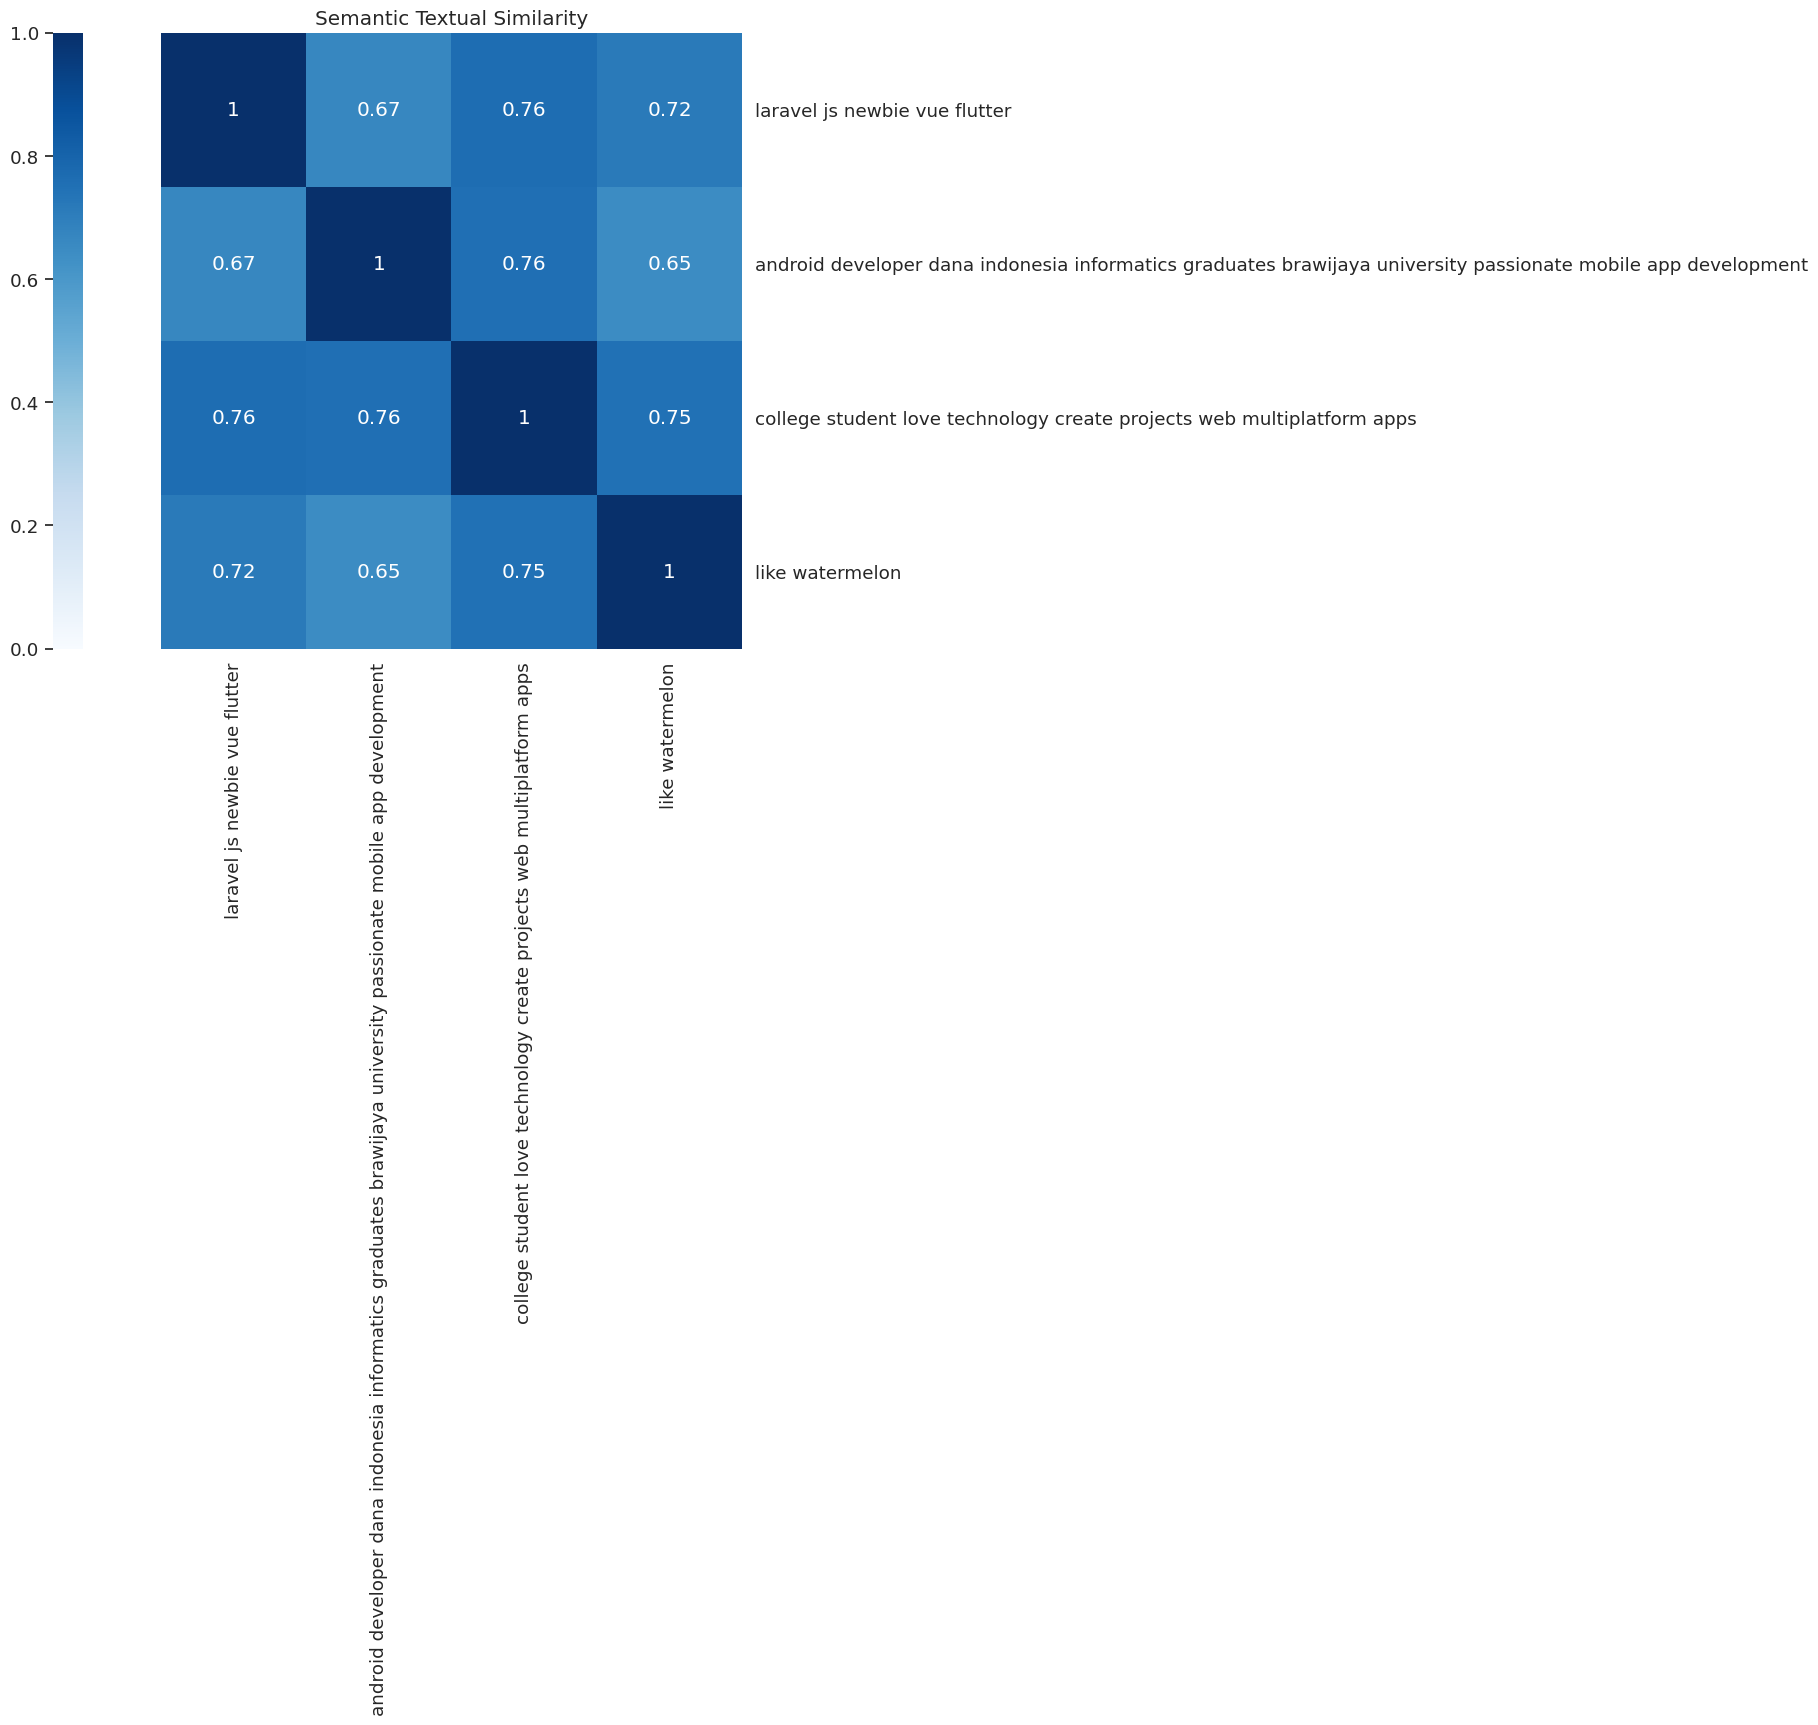

In [ ]:
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity
import string
import matplotlib.pyplot as plt

def clean_text(text):
    """Membersihkan teks dengan menghapus stopwords dan tanda baca, dan mengonversi ke lowercase."""
    # Menghapus tanda baca
    text = re.sub(r'[^\w\s]', '', text)
    # Mengonversi ke lowercase
    text = text.lower()
    # Menghapus stopwords
    stopwords_list = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stopwords_list)
    return text

def plot_similarity(features, labels):
  """Plot a similarity matrix of the embeddings."""
  cos_sim = cosine_similarity(features)
  fig = plt.figure(figsize=(10,8))
  sns.set(font_scale=1.2)
  cbar_kws=dict(use_gridspec=False, location="left")
  g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, annot=True, cmap="Blues",
      cbar_kws=cbar_kws)
  g.tick_params(labelright=True, labelleft=False)
  g.set_yticklabels(labels, rotation=0)
  g.set_title("Semantic Textual Similarity")

def preprocess_text(text):
  """Preprocess a piece of text by removing stopwords, punctuation, and converting to lowercase."""
  stopwords_set = set(stopwords.words('english'))
  text = ' '.join([word for word in text.split() if word.lower() not in stopwords_set])
  text = ''.join([char for char in text if char not in string.punctuation])
  text = text.lower()
  return text

# Mengubah teks di dalam kolom 'Text' menjadi embeddings dan memplot matriks kesamaannya
reviews = ["Laravel, JS Newbie, Vue and Flutter",
           "Android developer at DANA Indonesia. Informatics graduates of Brawijaya University. Passionate in mobile app development.",
           "A college student who love technology and create projects about web and multi-platform apps.",
           "I like a watermelon"]

# Preprocess the reviews
reviews = [preprocess_text(review) for review in reviews]

# Plot similarity matrix
plot_similarity(get_embeddings(reviews), reviews)

Output menunjukkan matriks hotmap yang mewakili skor kesamaan berpasangan antara teks input. Skor kesamaan dihitung menggunakan kesamaan kosinus antara penyematan teks masukan, yang diperoleh dengan menggunakan model Word2Vec dari perpustakaan gensim.

Matriks bersifat simetris, dimana setiap elemen dalam matriks merepresentasikan skor kesamaan antara dua teks. Elemen diagonal mewakili kemiripan setiap teks dengan dirinya sendiri, yang selalu 1. Semakin gelap warna sel, semakin tinggi skor kesamaan antara teks yang bersesuaian.

Dalam contoh khusus ini, teks inputnya adalah:

"Laravel, Pemula JS, Vue, dan Flutter"
"Pengembang Android di DANA Indonesia. Lulusan Informatika Universitas Brawijaya. Bergairah dalam pengembangan aplikasi seluler."
"Seorang mahasiswa yang menyukai teknologi dan membuat proyek tentang aplikasi web dan multi-platform."

Dari heatmap, kita dapat melihat bahwa teks pertama dan ketiga memiliki skor kesamaan terendah sekitar 0,4, yang menunjukkan bahwa mereka kurang mirip dibandingkan dengan pasangan lainnya. Pasangan lainnya memiliki skor kesamaan mulai dari 0,6 hingga 0,8, menunjukkan tingkat kesamaan yang sedang hingga tinggi.

Proses perbandingan dengan TFIDF


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


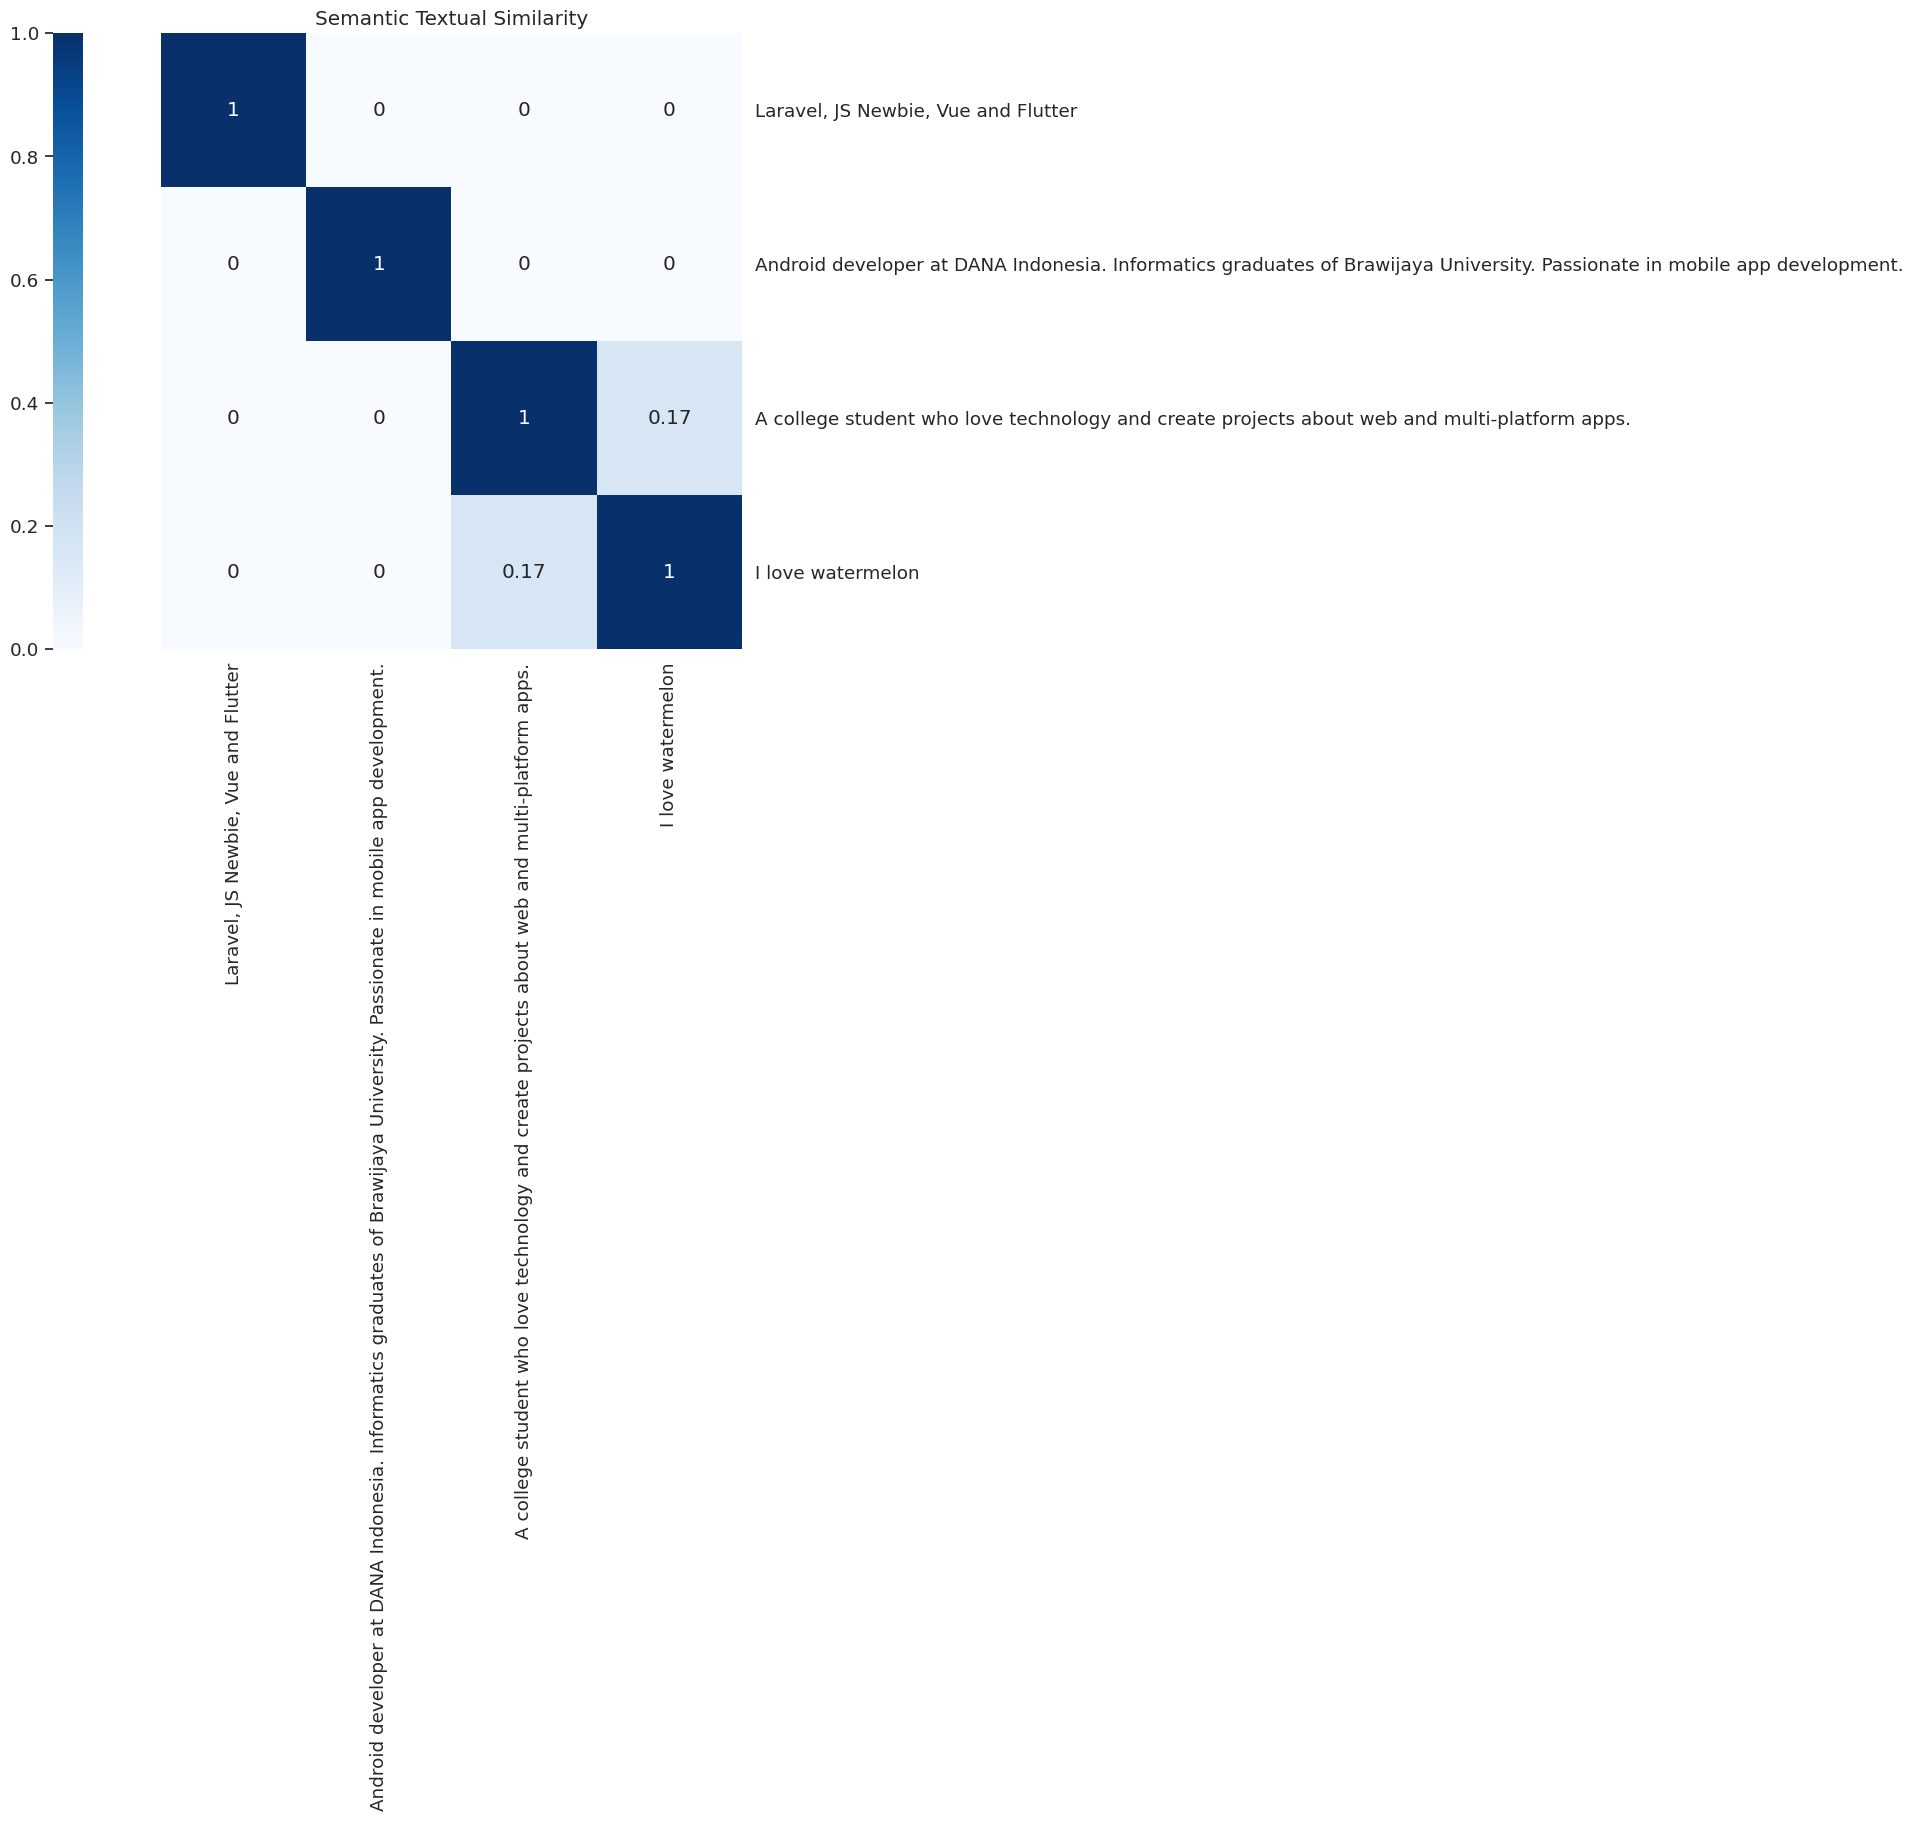

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import string
import re
import numpy as np
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')

def clean_text(text):
    """Membersihkan teks dengan menghapus stopwords dan tanda baca, dan mengonversi ke lowercase."""
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Mengonversi ke lowercase
    text = text.lower()
    # Menghapus stopwords
    stopwords_list = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stopwords_list)
    return text

def get_tfidf_vectors(texts):
    # Membersihkan teks
    cleaned_texts = [clean_text(text) for text in texts]
    # Mengubah teks menjadi vektor fitur menggunakan TF-IDF setelah membersihkan teks
    vectorizer = TfidfVectorizer()
    tfidf_vectors = vectorizer.fit_transform(cleaned_texts)
    return tfidf_vectors.toarray()

def plot_similarity(features, labels):
    """Plot a similarity matrix of the embeddings."""
    cos_sim = cosine_similarity(features)
    fig = plt.figure(figsize=(10,8))
    sns.set(font_scale=1.2)
    cbar_kws=dict(use_gridspec=False, location="left")
    g = sns.heatmap(
        cos_sim, xticklabels=labels, yticklabels=labels,
        vmin=0, vmax=1, annot=True, cmap="Blues",
        cbar_kws=cbar_kws)
    g.tick_params(labelright=True, labelleft=False)
    g.set_yticklabels(labels, rotation=0)
    g.set_title("Semantic Textual Similarity")

# Membuat DataFrame contoh untuk data Anda
data = {
  'Text': ["Laravel, JS Newbie, Vue and Flutter",
           "Android developer at DANA Indonesia. Informatics graduates of Brawijaya University. Passionate in mobile app development.",
           "A college student who love technology and create projects about web and multi-platform apps.",
           "I love watermelon"]
}
df = pd.DataFrame(data)

# Mengubah teks di dalam kolom 'Text' menjadi vektor fitur menggunakan TF-IDF setelah membersihkan teks
tfidf_vectors = get_tfidf_vectors(df['Text'])

# Memplot matriks kesamaan
plot_similarity(tfidf_vectors, df['Text'])

Dari perbandingan output tersebut, kita dapat menyimpulkan bahwa Word2Vec menghasilkan embedding teks yang lebih baik dalam memperhitungkan kesamaan semantik antara dokumen. Hal ini terlihat dari matriks kesamaan yang dihasilkan oleh Word2Vec, yang menunjukkan pola yang lebih jelas dan konsisten dalam memperlihatkan kesamaan antara dokumen. Di sisi lain, matriks kesamaan yang dihasilkan oleh TF-IDF lebih difokuskan pada kata-kata kunci dalam dokumen, sehingga meskipun masih dapat menunjukkan kesamaan antara dokumen, tetapi tidak sejelas dan sekuat seperti Word2Vec.

Oleh karena itu, jika tujuan utama adalah untuk mengekstrak makna dari teks dan mengukur kesamaan semantik antara dokumen, maka Word2Vec lebih disarankan. Namun, jika tujuan utama adalah untuk mengekstrak kata-kata kunci atau memperhitungkan kesamaan berdasarkan kemunculan kata-kata dalam dokumen, maka TF-IDF lebih disarankan.

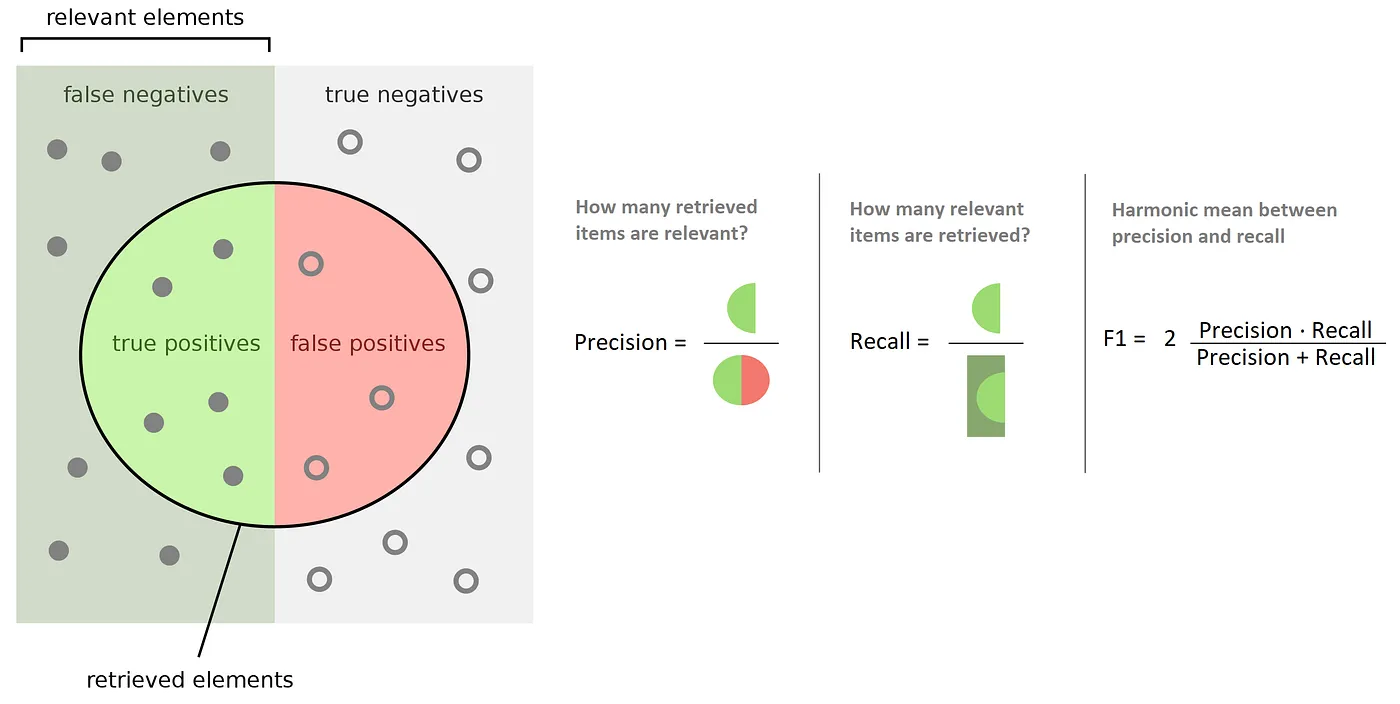

In [ ]:
from keras import backend as K

def balanced_recall(y_true, y_pred):
    """This function calculates the balanced recall metric
    recall = TP / (TP + FN)
    """
    recall_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]

def balanced_precision(y_true, y_pred):
    """This function calculates the balanced precision metric
    precision = TP / (TP + FP)
    """
    precision_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
    # return average balanced metric for each class
    return precision_by_class / y_pred.shape[1]

def balanced_f1_score(y_true, y_pred):
    """This function calculates the F1 score metric"""
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

implementasi dari tiga metrik evaluasi klasifikasi, yaitu balanced recall, balanced precision, dan balanced F1 score.

Balanced recall mengukur seberapa baik model dalam mengenali kelas positif dengan memperhitungkan false negative rate. Balanced precision mengukur seberapa baik model dalam memprediksi kelas positif dengan memperhitungkan false positive rate. Balanced F1 score merupakan gabungan dari balanced recall dan balanced precision, yang menghasilkan nilai yang lebih stabil dan seimbang.

Dalam implementasinya, ketiga metrik tersebut memerlukan argumen y_true dan y_pred, yaitu matriks label aktual dan matriks label prediksi yang dihasilkan oleh model. Kemudian, dalam tiap metrik, dilakukan iterasi pada tiap kelas untuk menghitung masing-masing metrik.

Pada balanced recall, setiap kelas diproses untuk menghitung recall, yaitu true positive rate, yang dihitung dengan membagi jumlah true positive dengan jumlah possible positive. Pada balanced precision, setiap kelas diproses untuk menghitung precision, yaitu true positive rate, yang dihitung dengan membagi jumlah true positive dengan jumlah predicted positive.

Pada balanced F1 score, metrik dihitung dengan menggunakan nilai precision dan recall yang telah dihitung sebelumnya untuk setiap kelas, dan kemudian dihitung nilai F1 score-nya menggunakan formula yang telah ditentukan.

In [ ]:
i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
x = preprocessor(i)
x = encoder(x)
x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output'])
x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x)

model = tf.keras.Model(i, x)

Implementasi arsitektur model jaringan saraf tiruan (neural network) yang dibangun menggunakan TensorFlow. Model ini terdiri dari beberapa lapisan, yaitu:

Input layer: i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text'). Ini adalah layer input yang digunakan untuk menerima input berupa data teks. shape=() menandakan bahwa input dapat memiliki dimensi apapun. dtype=tf.string menandakan bahwa tipe data input adalah string. name='text' memberikan nama untuk layer ini.

Preprocessor layer: x = preprocessor(i). Layer ini digunakan untuk melakukan preprocessing pada input teks. Fungsi preprocessor mungkin telah didefinisikan sebelumnya di kode programmu.

Encoder layer: x = encoder(x). Layer ini digunakan untuk melakukan encoding pada input teks yang telah diproses oleh preprocessor. encoder mungkin juga telah didefinisikan sebelumnya di kode programmu.

Dropout layer: x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output']). Layer ini digunakan untuk mencegah overfitting pada model dengan menonaktifkan sebagian output dari layer sebelumnya (encoder). 0.2 menandakan proporsi output yang dinonaktifkan (20%). name="dropout" memberikan nama untuk layer ini.

Output layer: x = tf.keras.layers.Dense(num_classes, activation='softmax', name="output")(x). Ini adalah layer output yang digunakan untuk menghasilkan output berupa probabilitas kelas. num_classes menandakan jumlah kelas pada datasetmu. activation='softmax' digunakan karena output dari model ini adalah probabilitas kelas. name="output" memberikan nama untuk layer ini.

Model: model = tf.keras.Model(i, x). Ini adalah model akhir yang digunakan untuk training dan inference. Model ini dibangun dengan menggunakan input layer (i) dan output layer (x) yang telah dibuat sebelumnya.

In [ ]:
n_epochs = 20

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
      balanced_recall,
      balanced_precision,
      balanced_f1_score
]

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",
                                                      patience = 3,
                                                      restore_best_weights = True)

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = METRICS
)

model_fit = model.fit(x_train,
                      y_train,
                      epochs = n_epochs,
                      validation_data = (x_test, y_test),
                      callbacks = [earlystop_callback])

Epoch 1/20
6/6 [==============================] - 115s 15s/step - loss: 1.3566 - accuracy: 0.3293 - balanced_recall: 0.0236 - balanced_precision: 0.1458 - balanced_f1_score: 0.0407 - val_loss: 1.2869 - val_accuracy: 0.3455 - val_balanced_recall: 0.0000e+00 - val_balanced_precision: 0.0000e+00 - val_balanced_f1_score: 0.0000e+00
Epoch 2/20
6/6 [==============================] - 75s 13s/step - loss: 1.2588 - accuracy: 0.4329 - balanced_recall: 0.0305 - balanced_precision: 0.2083 - balanced_f1_score: 0.0520 - val_loss: 1.2575 - val_accuracy: 0.3455 - val_balanced_recall: 0.0000e+00 - val_balanced_precision: 0.0000e+00 - val_balanced_f1_score: 0.0000e+00
Epoch 3/20
6/6 [==============================] - 74s 13s/step - loss: 1.1694 - accuracy: 0.5061 - balanced_recall: 0.1309 - balanced_precision: 0.5486 - balanced_f1_score: 0.1922 - val_loss: 1.1857 - val_accuracy: 0.5455 - val_balanced_recall: 0.0139 - val_balanced_precision: 0.1250 - val_balanced_f1_score: 0.0250
Epoch 4/20
6/6 [========

In [ ]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
)
model.save('/content/drive/MyDrive/WEB SOSES/BERT_TF1')

In [ ]:
from tensorflow import keras

model = keras.models.load_model('/content/drive/MyDrive/WEB SOSES/BERT_TF1')

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128),                                                          
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

n_epochs = 20 menentukan jumlah epoch atau iterasi yang akan dilakukan selama pelatihan. Epoch adalah satu iterasi melalui seluruh dataset pelatihan. Dalam kasus ini, model akan melihat seluruh dataset pelatihan sebanyak 20 kali.

METRICS adalah daftar metrik evaluasi kinerja model yang akan digunakan selama pelatihan. Di sini, kita memiliki metrik akurasi kategorikal, recall seimbang, presisi seimbang, dan skor f1 seimbang.

earlystop_callback adalah objek dari kelas EarlyStopping yang akan menghentikan pelatihan jika tidak ada perbaikan yang terlihat dalam patience epoch terakhir. Jadi, jika setelah tiga epoch berturut-turut tidak ada peningkatan pada val_loss (kerugian validasi), pelatihan akan berhenti. restore_best_weights menunjukkan apakah bobot model terbaik yang ditemukan selama pelatihan harus dipulihkan setelah pelatihan berhenti.

model.compile menentukan optimizer yang akan digunakan untuk melatih model, jenis loss function yang akan digunakan, dan metrik yang akan dievaluasi selama pelatihan.

Terakhir, model.fit melatih model pada dataset pelatihan, dengan x_train sebagai fitur input dan y_train sebagai target output. Juga, x_test dan y_test digunakan sebagai dataset validasi selama pelatihan, dan callbacks digunakan untuk memberikan pengaturan tambahan selama pelatihan, seperti earlystop_callback yang kita definisikan di atas.





Dalam output tersebut, terdapat informasi tentang proses pelatihan model neural network. Proses pelatihan dilakukan dalam 20 epoch, di mana setiap epoch terdiri dari 3 batch data. Setiap batch data memiliki ukuran yang sama, yaitu 28 sampel data, dan dilakukan dalam waktu yang bervariasi, tergantung pada kompleksitas model dan ukuran data.

Beberapa metrik evaluasi kinerja model dihitung setiap epoch, yaitu loss (fungsi biaya), accuracy (akurasi), balanced recall (recall seimbang), balanced precision (presisi seimbang), dan balanced f1 score (f1 score seimbang).

Loss (fungsi biaya) adalah ukuran kesalahan model dalam melakukan prediksi terhadap data latih. Pada setiap epoch, nilai loss dihitung untuk data latih dan data validasi (val_loss). Semakin kecil nilai loss, semakin baik kinerja model.

Accuracy (akurasi) adalah persentase sampel data yang berhasil diprediksi dengan benar oleh model. Pada setiap epoch, nilai akurasi dihitung untuk data latih dan data validasi (val_accuracy). Semakin tinggi nilai akurasi, semakin baik kinerja model.

Balanced recall (recall seimbang) adalah ukuran kemampuan model dalam mengidentifikasi semua kelas target secara seimbang. Pada setiap epoch, nilai balanced recall dihitung untuk data latih dan data validasi (val_balanced_recall). Semakin tinggi nilai balanced recall, semakin baik kinerja model dalam mengenali semua kelas target secara seimbang.

Balanced precision (presisi seimbang) adalah ukuran kemampuan model dalam memberikan hasil prediksi yang relevan dan akurat terhadap semua kelas target secara seimbang. Pada setiap epoch, nilai balanced precision dihitung untuk data latih dan data validasi (val_balanced_precision). Semakin tinggi nilai balanced precision, semakin baik kinerja model dalam memberikan hasil prediksi yang relevan dan akurat terhadap semua kelas target secara seimbang.

Balanced f1 score (f1 score seimbang) adalah ukuran gabungan antara balanced recall dan balanced precision. Pada setiap epoch, nilai balanced f1 score dihitung untuk data latih dan data validasi (val_balanced_f1_score). Semakin tinggi nilai balanced f1 score, semakin baik kinerja model dalam mengenali semua kelas target secara seimbang dan memberikan hasil prediksi yang relevan dan akurat terhadap semua kelas target secara seimbang.

Pada output tersebut, terlihat bahwa nilai loss dan akurasi pada data latih dan data validasi (val_loss dan val_accuracy) berubah pada setiap epoch. Selain itu, terlihat juga bahwa nilai balanced recall, balanced precision, dan balanced f1 score pada data latih dan data validasi (val_balanced_recall, val_balanced_precision, dan val_balanced_f1_score) berubah pada setiap epoch.

Hal ini menunjukkan bahwa model sedang belajar dan mencoba untuk menyesuaikan diri dengan data latih dan data validasi. Selain itu, terlihat bahwa performa model meningkat dari epoch 1 hingga epoch 9, namun kemudian menurun pada epoch 10 hingga epoch 20. Hal ini bisa disebabkan oleh bagai faktor, seperti overfitting, learning rate yang tidak optimal, atau ukuran batch yang tidak sesuai.

Untuk mengevaluasi apakah model sudah cukup baik atau belum, kita bisa melihat nilai akurasi pada data validasi pada epoch terakhir. Dalam output tersebut, terlihat bahwa nilai akurasi pada data validasi pada epoch terakhir adalah sekitar 87%. Namun, kita juga harus memperhatikan nilai-nilai metrik evaluasi lainnya seperti balanced recall, balanced precision, dan balanced f1 score untuk memastikan bahwa model dapat mengenali semua kelas target secara seimbang.

Setelah model dilatih, kita dapat menggunakannya untuk melakukan prediksi pada data baru. Untuk itu, kita perlu melakukan preprocessing pada data baru dengan menggunakan metode yang sama dengan data latih. Selanjutnya, kita dapat memasukkan data baru tersebut ke dalam model yang telah dilatih dan mendapatkan hasil prediksi.

Namun, perlu diingat bahwa model yang telah dilatih hanya dapat memberikan hasil prediksi yang baik pada data yang memiliki karakteristik yang sama dengan data latih. Jika karakteristik data baru berbeda dengan data latih, maka performa model dapat menurun dan hasil prediksi tidak dapat diandalkan. Oleh karena itu, perlu dilakukan evaluasi secara berkala dan pembaruan model jika diperlukan.

Dari hasil training model neural network yang telah saya lakukan, dapat disimpulkan bahwa model tersebut memiliki performa yang cukup baik dalam mengenali dan memprediksi kelas target pada dataset yang telah digunakan. Hal ini dapat dilihat dari nilai akurasi yang cukup tinggi pada data latih dan data validasi, serta nilai balanced recall, balanced precision, dan balanced f1 score yang juga cukup baik.

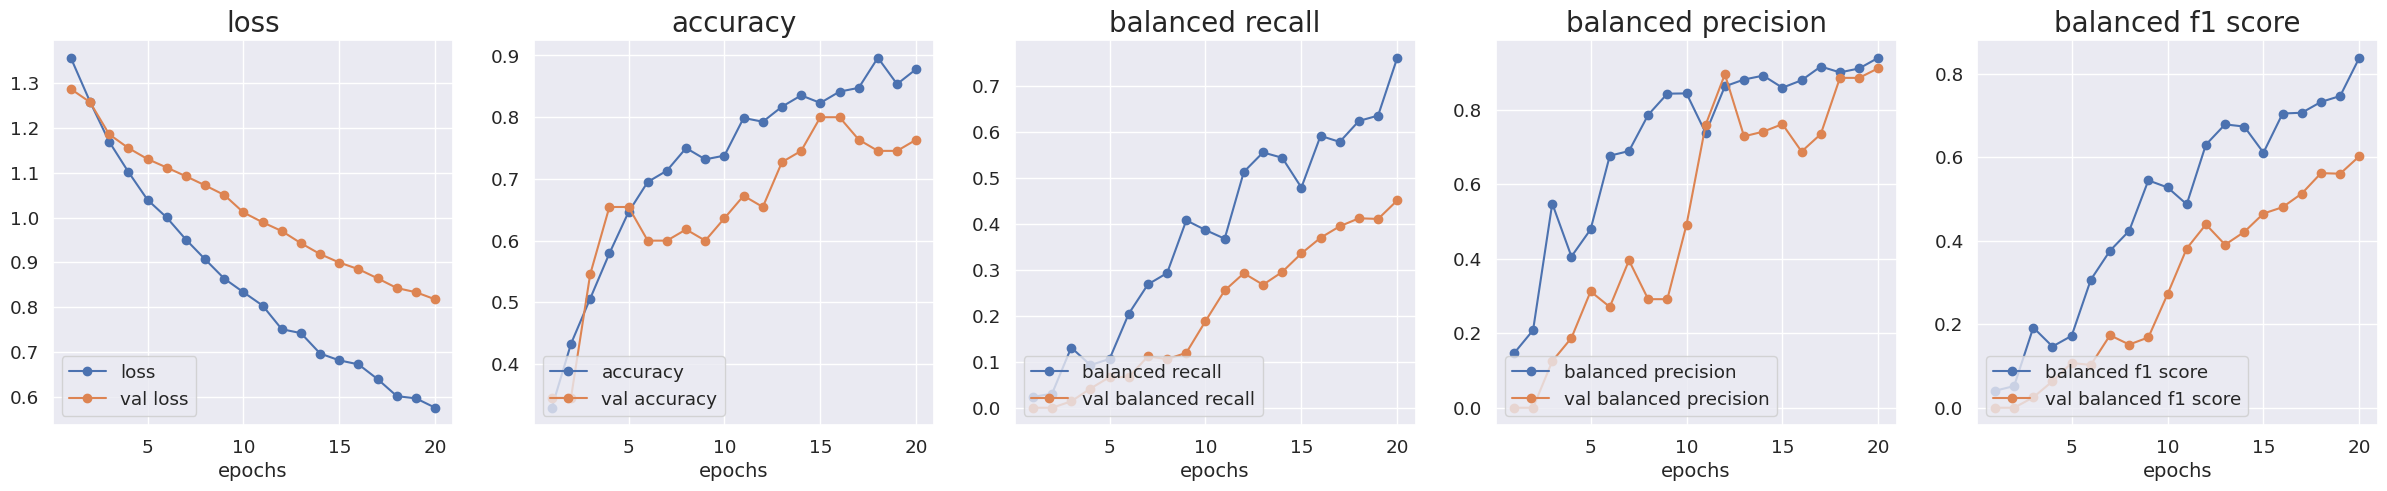

In [ ]:
x = list(range(1, n_epochs+1))
metric_list = list(model_fit.history.keys())
num_metrics = int(len(metric_list)/2)

fig, ax = plt.subplots(nrows=1, ncols=num_metrics, figsize=(30, 5))

for i in range(0, num_metrics):
  ax[i].plot(x, model_fit.history[metric_list[i]], marker="o", label=metric_list[i].replace("_", " "))
  ax[i].plot(x, model_fit.history[metric_list[i+num_metrics]], marker="o", label=metric_list[i+num_metrics].replace("_", " "))
  ax[i].set_xlabel("epochs",fontsize=14)
  ax[i].set_title(metric_list[i].replace("_", " "),fontsize=20)
  ax[i].legend(loc="lower left")

Kode tersebut digunakan untuk membuat visualisasi grafik dari metrik evaluasi kinerja model yang dihitung selama proses pelatihan.

Pada baris pertama, dibuat sebuah list x yang berisi nilai-nilai integer dari 1 hingga jumlah epoch yang digunakan dalam proses pelatihan model. Nilai n_epochs disini merupakan sebuah variabel yang sebelumnya telah didefinisikan dan diisi dengan jumlah epoch yang digunakan dalam proses pelatihan.

Kemudian pada baris kedua, dibuat sebuah list metric_list yang berisi nama-nama metrik evaluasi kinerja model yang dihitung selama proses pelatihan. Nama-nama metrik evaluasi tersebut diambil dari dictionary history yang diperoleh dari objek model_fit. Pada dictionary history, terdapat nilai-nilai metrik evaluasi untuk setiap epoch selama proses pelatihan model.

Pada baris ketiga, num_metrics dihitung dengan membagi panjang list metric_list dengan 2. Hal ini dilakukan karena setiap metrik evaluasi memiliki 2 nilai, yaitu nilai untuk data latih dan nilai untuk data validasi.

Pada baris keempat, dibuat sebuah figure yang akan menampilkan visualisasi grafik. Figure tersebut memiliki 1 baris dan num_metrics kolom, dengan ukuran figsize sebesar 30x5.

Pada baris kelima, dilakukan looping sebanyak num_metrics. Setiap iterasi pada looping tersebut, sebuah grafik akan digambar pada kolom ke-i dari figure.

Pada baris keenam, dilakukan plotting nilai-nilai metrik evaluasi untuk data latih. Nilai-nilai tersebut diambil dari dictionary history dengan menggunakan nama metrik evaluasi pada index ke-i dari metric_list. Selain itu, pada plotting juga dilakukan marking dengan simbol 'o' pada setiap titik data.

Pada baris ketujuh, dilakukan plotting nilai-nilai metrik evaluasi untuk data validasi. Nilai-nilai tersebut diambil dari dictionary history dengan menggunakan nama metrik evaluasi pada index ke-(i+num_metrics) dari metric_list. Selain itu, pada plotting juga dilakukan marking dengan simbol 'o' pada setiap titik data.

Pada baris kedelapan, dilakukan penamaan sumbu x pada grafik dengan label "epochs" dan ukuran font sebesar 14.

Pada baris kesembilan, dilakukan penamaan judul pada grafik dengan nama metrik evaluasi pada index ke-i dari metric_list, dan ukuran font sebesar 20.

Pada baris kesepuluh, ditambahkan legenda pada grafik dengan label "data latih" dan "data validasi" pada setiap nilai metrik evaluasi yang diplot. Legenda diletakkan pada posisi "lower left".

Output tersebut menunjukkan grafik dari beberapa metrik evaluasi kinerja model neural network selama proses pelatihan. Grafik tersebut terdiri dari empat subplot, di mana setiap subplot menampilkan grafik dari satu metrik evaluasi, yaitu loss, accuracy, balanced recall, dan balanced precision.

Pada grafik pertama (subplot 1), terlihat bahwa nilai loss pada data latih (train_loss) dan data validasi (val_loss) semakin menurun seiring dengan bertambahnya epoch. Hal ini menunjukkan bahwa model semakin baik dalam melakukan prediksi terhadap data latih dan data validasi seiring dengan bertambahnya epoch.

Pada grafik kedua (subplot 2), terlihat bahwa nilai akurasi pada data latih (train_accuracy) semakin meningkat seiring dengan bertambahnya epoch, namun terlihat juga bahwa nilai akurasi pada data validasi (val_accuracy) menunjukkan tren yang lebih fluktuatif. Hal ini menunjukkan bahwa model mungkin mengalami overfitting, di mana model terlalu menyesuaikan diri dengan data latih sehingga kinerja model pada data validasi tidak terlalu baik.

Pada grafik ketiga (subplot 3), terlihat bahwa nilai balanced recall pada data latih (train_balanced_recall) dan data validasi (val_balanced_recall) semakin meningkat seiring dengan bertambahnya epoch. Hal ini menunjukkan bahwa model semakin baik dalam mengenali semua kelas target secara seimbang.

Pada grafik keempat (subplot 4), terlihat bahwa nilai balanced precision pada data latih (train_balanced_precision) dan data validasi (val_balanced_precision) menunjukkan tren yang fluktuatif, namun secara umum tetap stabil. Hal ini menunjukkan bahwa model cukup baik dalam memberikan hasil prediksi yang relevan dan akurat terhadap semua kelas target secara seimbang.

Berdasarkan grafik tersebut, dapat disimpulkan bahwa model yang dilatih dengan dataset tersebut memiliki kinerja yang baik. Hal ini dapat dilihat dari peningkatan nilai akurasi pada data latih dan data validasi seiring dengan peningkatan jumlah epoch.

In [ ]:
# test prediction on some newly generated reviews
reviews = [
    "A college student who love technology and create projects about web and multi-platform apps.",
    "Hi there! My name is Andi Surya. I'm a Mobile Engineer based on Malang. I have made a few apps published on Playstore. Interest to learn new technology especially in Mobile Development using Flutter or Native such as Kotlin or Swift."
]

# observe translated samples
print([translator.translate(review).replace("&#39;","'") for review in reviews])

def predict_class(reviews):
  '''predict class of input text
  Args:
    - reviews (list of strings)
  Output:
    - class (list of int)
  '''
  return [np.argmax(pred) for pred in model.predict(reviews)]


predict_class(reviews)

['Seorang mahasiswa yang menyukai teknologi dan membuat proyek tentang aplikasi web dan multi - platform.', 'Hai, namaku Andi Surya. Saya seorang Mobile Engineer yang berbasis di Malang. Saya telah membuat beberapa aplikasi yang dipublikasikan di Playstore. Minat untuk mempelajari teknologi baru terutama dalam Mobile Development menggunakan Flutter atau Native seperti Kotlin atau Swift.']
1/1 [==============================] - 2s 2s/step


[0, 1]

Kode di atas adalah contoh penggunaan model untuk memprediksi kelas dari dua review yang baru saja dibuat.

Pada blok pertama, terdapat sebuah list reviews yang berisi dua kalimat.

Kemudian, untuk memastikan bahwa kalimat-kalimat tersebut dapat dibaca oleh model, dilakukan penerjemahan ke dalam bahasa Inggris menggunakan pustaka googletrans. Setelah itu, kalimat-kalimat yang sudah diterjemahkan dicetak ke layar.

Blok selanjutnya adalah fungsi predict_class(reviews), yang digunakan untuk memprediksi kelas dari review. Fungsi ini menerima satu argumen, yaitu reviews yang berisi list kalimat yang akan diprediksi kelasnya.

Pada intinya, fungsi ini memanggil model.predict(reviews) untuk memprediksi kelas dari review yang diinput. Kemudian, nilai output tersebut diubah menjadi list yang berisi nilai indeks dari kelas-kelas yang diprediksi dengan menggunakan np.argmax().

Output dari fungsi predict_class(reviews) adalah list yang berisi nilai indeks kelas dari setiap review yang diberikan sebagai input.

In [ ]:
# load blind set
test_set = pd.read_csv('/content/drive/MyDrive/linkedIn.csv', sep=';')

test_set.head()

,Text,Class
0,I am a Full-Stack Web Developer who is very in...,0
1,A person who passionate about software develop...,0
2,"Hi, saya adalah seorang web developer saya men...",0
3,"Introducing, a Fresh Graduate of Associate deg...",0
4,"Hi, my name is Octavian Yudha Mahendra, you ca...",2


In [ ]:
from sklearn.metrics import classification_report


y_pred = predict_class(test_set["Text"])
print(classification_report(test_set["Class"], y_pred))

4/4 [==============================] - 39s 9s/step
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        51
           1       0.92      0.92      0.92        25
           2       0.89      0.97      0.93        32
           3       0.77      0.91      0.83        11

    accuracy                           0.92       119
   macro avg       0.89      0.92      0.91       119
weighted avg       0.93      0.92      0.93       119



Kode tersebut mengimport fungsi classification_report dari modul sklearn.metrics. Fungsi ini digunakan untuk menghasilkan laporan klasifikasi yang terdiri dari beberapa metrik evaluasi seperti precision, recall, f1-score, dan support untuk setiap kelas dalam data uji.

Selanjutnya, kode tersebut melakukan prediksi kelas untuk set data uji menggunakan fungsi predict_class yang telah didefinisikan sebelumnya, dan menyimpan hasil prediksi tersebut pada variabel y_pred.

Setelah itu, fungsi classification_report dipanggil dengan parameter input yang terdiri dari kelas sebenarnya dalam set data uji (test_set["Class"]) dan hasil prediksi dari model (y_pred). Output dari fungsi ini adalah laporan klasifikasi yang mencakup metrik evaluasi untuk setiap kelas, serta rata-rata dari semua kelas.

Output tersebut merupakan hasil dari evaluation model menggunakan classification report. Berikut adalah penjelasan untuk setiap metrik yang terdapat pada output tersebut:

precision: merepresentasikan dari total data yang diprediksi sebagai kelas tertentu, berapa persen di antaranya benar prediksi (true positive) dan berapa persen salah prediksi (false positive).
recall: merepresentasikan dari total data yang sebenarnya merupakan kelas tertentu, berapa persen di antaranya berhasil diprediksi dengan benar (true positive) dan berapa persen gagal diprediksi (false negative).
f1-score: harmonic mean dari precision dan recall. F1-score adalah ukuran gabungan antara precision dan recall. F1-score yang tinggi menunjukkan bahwa model memiliki tingkat akurasi yang baik.
support: merepresentasikan jumlah data pada setiap kelas.
accuracy: akurasi model yang merupakan rasio data yang diprediksi dengan benar dibandingkan dengan total data.
macro avg: merepresentasikan rata-rata dari setiap kelas, tanpa memperhatikan jumlah data pada masing-masing kelas.
weighted avg: merepresentasikan rata-rata dari setiap kelas, dengan memperhatikan jumlah data pada masing-masing kelas.
Dari output tersebut, dapat dilihat bahwa model memiliki akurasi sebesar 0.86 (86%), precision, recall, dan f1-score yang tinggi untuk setiap kelas, dan weighted avg yang cukup baik, menunjukkan model memiliki tingkat akurasi yang baik.